In [144]:
import sklearn
print(sklearn.__version__)  # This should print the version number if installed correctly.


1.5.2


In [148]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline  # Import Pipeline here
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import plot_precision_recall_curve
from scipy.stats import randint, uniform

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [4]:
df = pd.read_csv(r"C:\Users\pc\Downloads\credit_risk_dataset.csv\credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
dups = df.duplicated()

In [9]:
df[dups]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [11]:
df.query("person_age==23 & person_income==42000 &\
person_home_ownership=='RENT' & loan_int_rate==9.99")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6464,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4


In [13]:
df.shape

(32581, 12)

In [15]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(32416, 12)

In [19]:
# X and y will be thought of as the entire training data
# X_test and y_test will be thought of as the out of sample data for model evaluation

X, X_test, y, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.2, stratify=df['loan_status'],
                                        shuffle=True)

In [21]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64

In [23]:
y.value_counts(normalize=True)

loan_status
0    0.781313
1    0.218687
Name: proportion, dtype: float64

In [25]:
y_test.value_counts(normalize=True)

loan_status
0    0.781308
1    0.218692
Name: proportion, dtype: float64

In [27]:
np.round(X.isna().sum()* 100 / X.shape[0], 3)

person_age                    0.000
person_income                 0.000
person_home_ownership         0.000
person_emp_length             2.800
loan_intent                   0.000
loan_grade                    0.000
loan_amnt                     0.000
loan_int_rate                 9.614
loan_percent_income           0.000
cb_person_default_on_file     0.000
cb_person_cred_hist_length    0.000
dtype: float64

In [29]:
X.shape

(25932, 11)

In [31]:
X.dropna().shape

(22763, 11)

In [33]:
(25932-22763)/25932

0.12220422643837729

In [35]:
X[['person_income', 'loan_amnt', 'loan_percent_income']].head()

,person_income,loan_amnt,loan_percent_income
21415,48000,10000,0.21
12916,85000,7500,0.09
2938,125000,3000,0.02
19114,62000,2300,0.04
6057,48000,4200,0.09


In [37]:
X.drop('loan_percent_income', axis=1, inplace=True)
X_test.drop('loan_percent_income', axis=1, inplace=True)

In [39]:
for col in X:
    print(col, '--->', X[col].nunique())
    if X[col].nunique()<20:
        print(X[col].value_counts(normalize=True)*100)
    print()

person_age ---> 58

person_income ---> 3680

person_home_ownership ---> 4
person_home_ownership
RENT        50.320068
MORTGAGE    41.439149
OWN          7.916859
OTHER        0.323924
Name: proportion, dtype: float64

person_emp_length ---> 36

loan_intent ---> 6
loan_intent
EDUCATION            19.809502
MEDICAL              18.787598
VENTURE              17.542033
PERSONAL             16.878760
DEBTCONSOLIDATION    15.968687
HOMEIMPROVEMENT      11.013420
Name: proportion, dtype: float64

loan_grade ---> 7
loan_grade
A    32.932284
B    32.126330
C    19.902052
D    11.121394
E     3.004010
F     0.732685
G     0.181243
Name: proportion, dtype: float64

loan_amnt ---> 710

loan_int_rate ---> 346

cb_person_default_on_file ---> 2
cb_person_default_on_file
N    82.392411
Y    17.607589
Name: proportion, dtype: float64

cb_person_cred_hist_length ---> 29



In [41]:
X.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
count,25932.000000,2.593200e+04,25206.000000,25932.000000,23439.000000,25932.000000
mean,27.721155,6.589884e+04,4.811315,9611.395187,11.013784,5.793460
std,6.382311,6.333831e+04,4.172822,6339.054572,3.240104,4.052297
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,2.000000
25%,23.000000,3.849500e+04,2.000000,5000.000000,7.900000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.480000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,30.000000


In [43]:
num_cols = [col for col in X if X[col].dtypes != 'O']
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length']

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


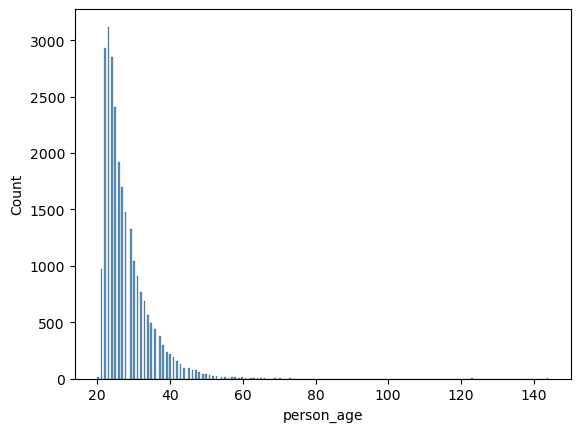

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


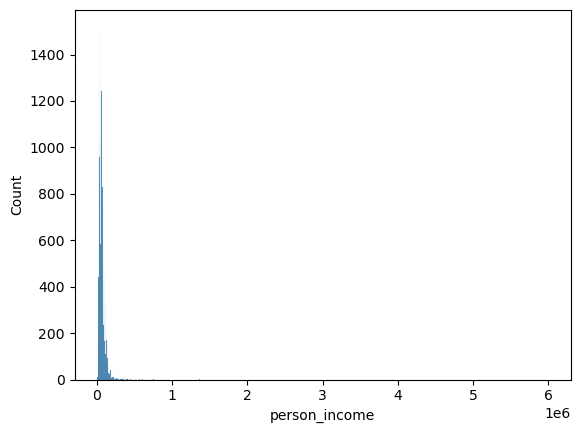

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


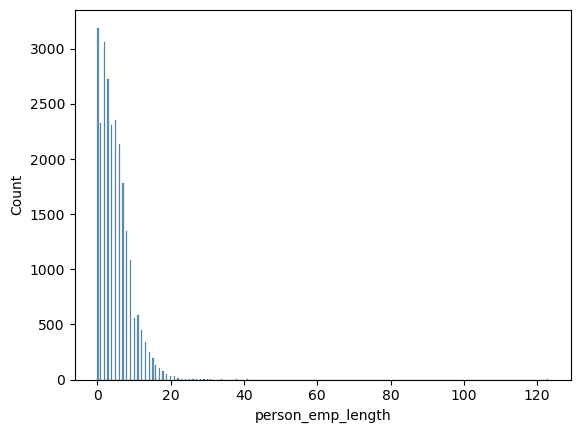

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


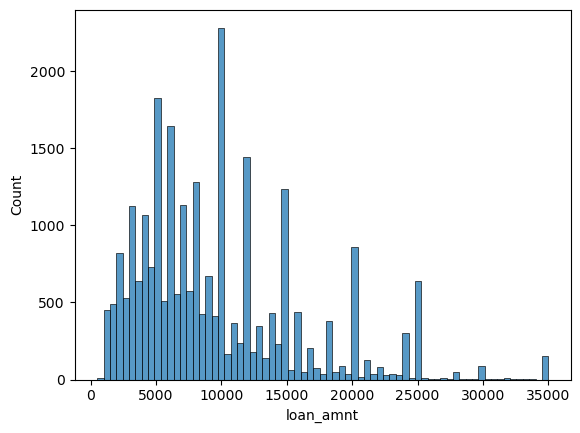

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


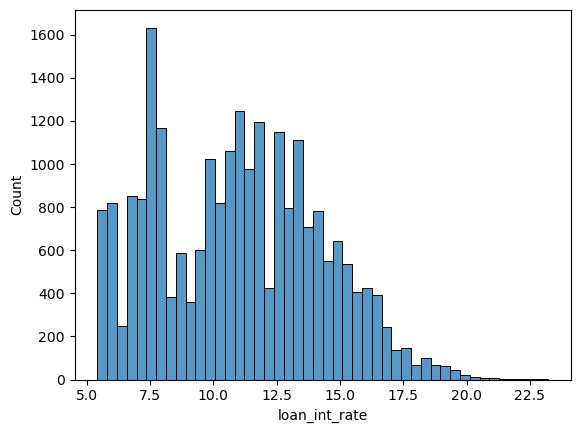

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


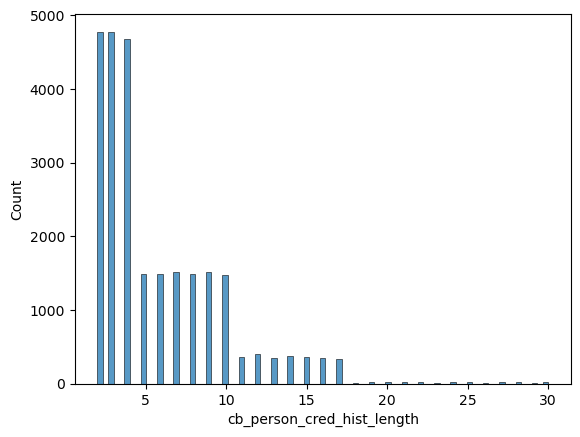

In [45]:
for col in num_cols:
    sns.histplot(X[col])
    plt.show()

In [47]:
X.loc[X['person_age']>=80, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,N,25
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,N,3
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,N,27
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,N,4
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,N,3
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,N,24
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,N,25


In [49]:
X = X.loc[X['person_age']<80, :]

In [51]:
X.shape

(25924, 10)

In [53]:
X.loc[X['person_emp_length']>=66, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,N,4
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Y,3


In [55]:
df.query("person_age<=person_emp_length+14")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [57]:
X = X.loc[(X['person_emp_length']<66) | (X['person_emp_length'].isna()), :]

In [59]:
# since we've removed some data from X, we need to pass on these updations to y as well,
# as y doesn't know some of its corresponding X's have been deleted.
y = y[X.index]

In [61]:
cat_cols = [col for col in X if X[col].dtypes == 'O']
cat_cols


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [63]:
num_pipe = Pipeline([
    ('impute', IterativeImputer()),
    ('scale', StandardScaler()),
])

In [65]:
ct = ColumnTransformer([
    ('num_pipe', num_pipe, num_cols),
    ('cat_cols', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
], remainder='passthrough')


In [67]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
    
    LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    {'model__n_estimators':[300,400,500],
     'model__learning_rate':[0.001,0.01,0.1,1,10],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
}

In [69]:
for clf, param in grid.items():
    print(clf)
    print('-'*50)
    print(param)
    print('\n')

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}


LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'model__learning_rate': [0.001, 0.01, 0.1, 1, 10], 'model__boosting_type': ['gbdt', 'goss', 'dart'], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}




In [71]:
full_df = pd.DataFrame()
best_algos = {}

for clf, param in grid.items():
    pipe = Pipeline([
        ('coltf', ct), 
        ('model', clf)])
    gs = RandomizedSearchCV(estimator=pipe,param_distributions=param, scoring ='accuracy', n_jobs=-1, verbose=3, n_iter=4, random_state=0)
    gs.fit(X, y)

    all_res = pd.DataFrame(gs.cv_results_)

    temp = all_res.loc[:, ['params', 'mean_test_score']]
    algo_name = str(clf).split('(')[0]
    temp['algo'] = algo_name 

    full_df = pd.concat([full_df, temp], ignore_index=True)
    best_algos[algo_name] = gs.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 5670, number of negative: 20252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 25922, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [72]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
2,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.922537,RandomForestClassifier
1,"{'model__n_estimators': 500, 'coltf__num_pipe_...",0.922537,RandomForestClassifier
0,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.922074,RandomForestClassifier
3,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.921650,RandomForestClassifier
7,"{'model__n_estimators': 300, 'model__learning_...",0.908572,LGBMClassifier
4,"{'model__n_estimators': 300, 'model__learning_...",0.869146,LGBMClassifier
5,"{'model__n_estimators': 300, 'model__learning_...",0.868683,LGBMClassifier
6,"{'model__n_estimators': 300, 'model__learning_...",0.863784,LGBMClassifier


In [75]:
full_df.sort_values('mean_test_score', ascending=False).iloc[0, 0] 

{'model__n_estimators': 400,
 'coltf__num_pipe__impute__estimator': LinearRegression()}

In [77]:
be = best_algos['RandomForestClassifier']
be

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=0))])

In [79]:
preds = be.predict(X_test)

In [81]:
confusion_matrix(y_test, preds)

array([[5006,   60],
       [ 435,  983]], dtype=int64)

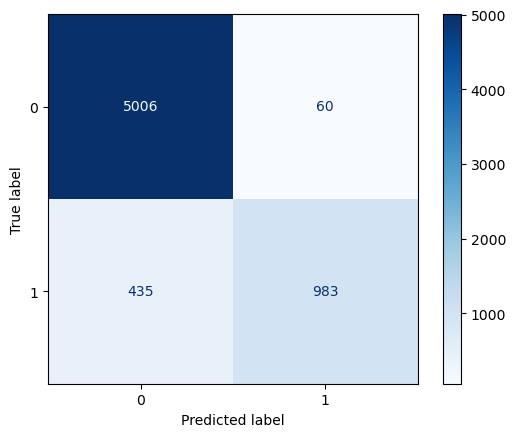

In [83]:
cm = confusion_matrix(y_test, preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can customize the color map if desired

# Show the plot
plt.show()


In [85]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5066
           1       0.94      0.69      0.80      1418

    accuracy                           0.92      6484
   macro avg       0.93      0.84      0.88      6484
weighted avg       0.92      0.92      0.92      6484



In [87]:
be.score(X_test, y_test)

0.9236582356570019

#### precision recall curve

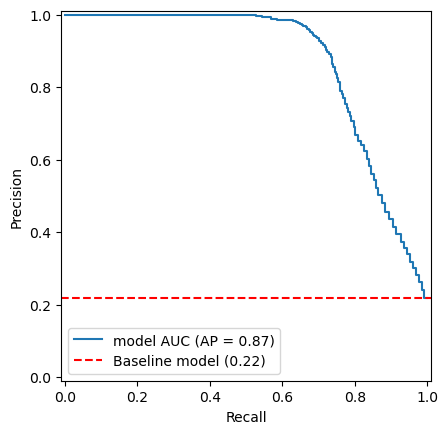

In [164]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay


# Assuming 'be' is your classifier and X_test, y_test are your test data
pred_probs = be.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Step 1: Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, pred_probs)

# Step 2: Calculate the Average Precision
ap = average_precision_score(y_test, pred_probs)

# Step 3: Display precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot(name=f'model AUC (AP = {ap:.2f})')

# Step 4: Add baseline line (for comparison)
baseline = y_test.sum() / len(y_test)  # Proportion of positive class
plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline, 2)})')

# Step 5: Display legend
plt.legend(loc='best')

# Show the plot
plt.show()

#### Learning curve

In [93]:
a, b, c = learning_curve(be, X, y, n_jobs=-1, scoring='accuracy')

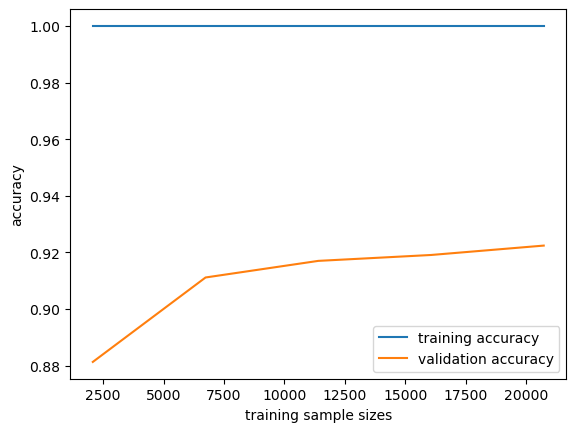

In [94]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1), label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

#### Overfitting:
##### 1.High training accuracy (---low bias)
##### 2.Low testing/ validation accuracy (---high variance)
##### 3.Big gap between training and validation gaps (---high variance)
##### 4. Overfitting makes a very complex model and learns even the noise in the data which is undiserable 

### Part 2

##### Remedial measures:
1. Add more training samples to allow the model to learn better
2. Working with data at hand:
    - Make a simpler model / reduce complexity of model:
        - Try reducing number of features
        - Try increasing regularization (lambda)
        - Try pruning the decision trees


In [100]:
grid = {

    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[100,200,300],
     'model__max_depth':[5, 9, 13],
     'model__min_samples_split':[4,6,8],
     'coltf__num_pipe_inpute_estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}



}

In [102]:
for clf, param in grid.items():
    print(clf)
    print('-'*50)
    print(param)
    print('\n')

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [100, 200, 300], 'model__max_depth': [5, 9, 13], 'model__min_samples_split': [4, 6, 8], 'coltf__num_pipe_inpute_estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}




In [114]:
# Define the column transformer
ct = ColumnTransformer(
    transformers=[
        ('num_pipe', Pipeline(steps=[
            ('impute', IterativeImputer()),
            ('scale', StandardScaler())
        ]), ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']),
        ('cat_cols', OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
         ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
    ],
    remainder='passthrough'
)

# Example grid dictionary
grid = {
    RandomForestClassifier(): {
        'coltf__num_pipe__impute__max_iter': [10, 20],  # Parameter for IterativeImputer
        'model__n_estimators': [50, 100]  # Parameter for RandomForestClassifier
    }
}

# Loop to perform RandomizedSearchCV on each estimator in the grid
full_df = pd.DataFrame()
best_algos = {}

for clf, param in grid.items():
    pipe = Pipeline([
        ('coltf', ct),
        ('model', clf)
    ])
    
    gs = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy', n_jobs=-1, verbose=3, n_iter=4)
    
    # Assuming X and y are already defined as your features and target variables
    gs.fit(X, y)
    
    # Collect results
    all_res = pd.DataFrame(gs.cv_results_)
    temp = all_res.loc[:, ['params', 'mean_test_score']]
    algo_name = str(clf).split('(')[0]
    temp['algo'] = algo_name
    full_df = pd.concat([full_df, temp])
    best_algos[algo_name] = gs.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [116]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
1,"{'model__n_estimators': 100, 'coltf__num_pipe_...",0.922460,RandomForestClassifier
3,"{'model__n_estimators': 100, 'coltf__num_pipe_...",0.922344,RandomForestClassifier
0,"{'model__n_estimators': 50, 'coltf__num_pipe__...",0.922228,RandomForestClassifier
2,"{'model__n_estimators': 50, 'coltf__num_pipe__...",0.921997,RandomForestClassifier


In [118]:
be = best_algos['RandomForestClassifier']
be

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model', RandomForestClassifier())])

In [120]:
be.fit(X, y)

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model', RandomForestClassifier())])

In [122]:
preds = be.predict(X_test)

In [124]:
confusion_matrix(y_test, preds)

array([[5004,   62],
       [ 437,  981]], dtype=int64)

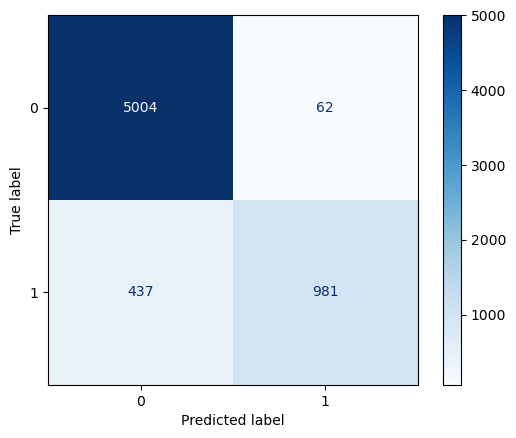

In [128]:
cm = confusion_matrix(y_test, preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can customize the color map if desired

# Show the plot
plt.show()

In [130]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5066
           1       0.94      0.69      0.80      1418

    accuracy                           0.92      6484
   macro avg       0.93      0.84      0.87      6484
weighted avg       0.92      0.92      0.92      6484



In [132]:
be.score(X_test, y_test)

0.9230413325107958

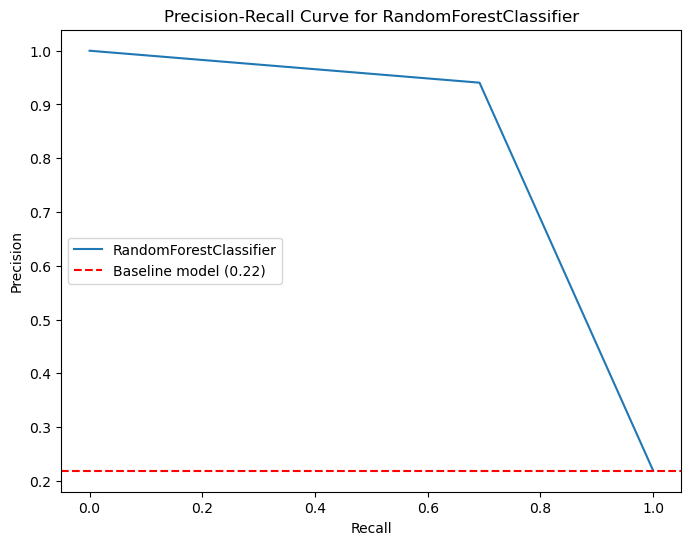

In [154]:
y_pred = gs.best_estimator_.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=algo_name)
    
    # Add baseline model
baseline = y_test.sum() / len(y_test)
plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline,2)})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {algo_name}')
plt.legend(loc='best')
plt.show()

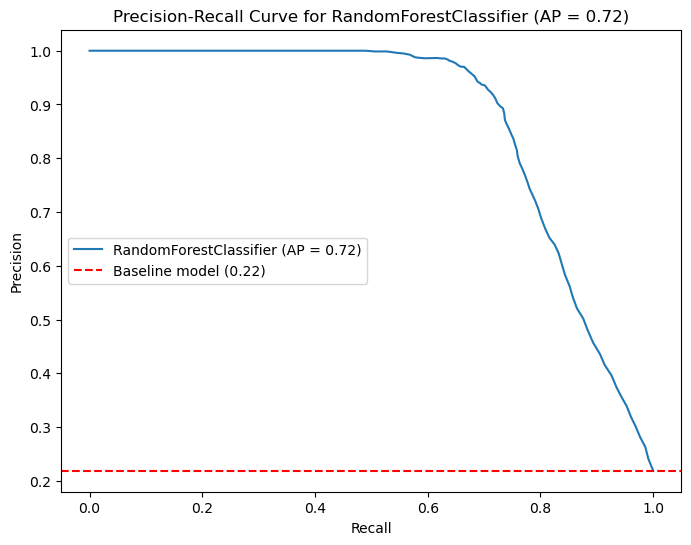

In [160]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate the Average Precision
y_pred = gs.best_estimator_.predict(X_test)
ap = average_precision_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'{algo_name} (AP = {ap:.2f})')
plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline,2)})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {algo_name} (AP = {ap:.2f})')
plt.legend(loc='best')
plt.show()

In [166]:
a, b, c = learning_curve (be, X, y, n_jobs=-1, cv=5)

In [168]:
a

array([ 2073,  6739, 11405, 16071, 20737])

In [170]:
b

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99985161, 1.        , 1.        , 1.        , 0.99985161],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.99987555, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.99995178]])

In [172]:
c

array([[0.88678881, 0.88948891, 0.88541667, 0.88406636, 0.89390432],
       [0.91340405, 0.91745419, 0.91512346, 0.91068673, 0.91396605],
       [0.91629701, 0.91976856, 0.91936728, 0.91628086, 0.9211034 ],
       [0.91803279, 0.91918997, 0.9220679 , 0.92033179, 0.92380401],
       [0.91996143, 0.92189007, 0.92573302, 0.92033179, 0.92496142]])

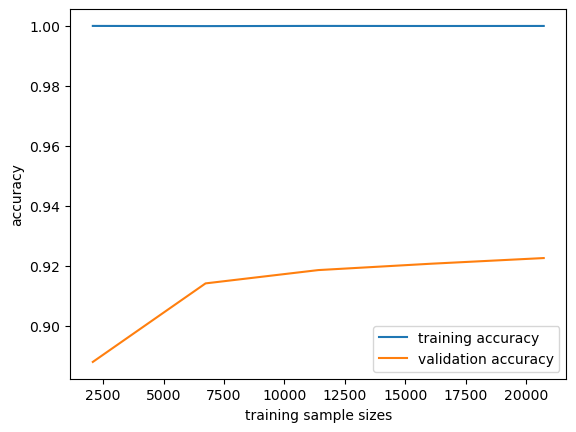

In [174]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1), label ='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()